# Tijuana Results -- March 29, 2024

Git: `2d5e2612b485b10055834a38af6a16dfa8f1dfad`

To generate the cache/gpt2_happy_sad_03292024.json (~2500 prompt-adjective pairs
with reps), I ran this command. 

```bash
python3 scripts/get_value_reps.py \
    --adjective_json datasets/happy_sad_adjectives.json \
    --prompt_templates datasets/prompt_templates_03292024.json \
    --model_name gpt2 \
    --out_path cache/gpt2_happy_sad_03292024.json 
```

To run the grok script, we'll run this command: 

```
python scripts/grok_intrinsic_geometry.py \
    --plot-lr \
    --pca-components 20 \
    --knn-clusters 5
```
Results: 
The weights of the linear regression model trained on `happy_sad_adjectives.json` 
subbed into `prompt_templates_03292024.json` for predicting the valence 
(binary, +/-) can be found here: 


## Arousal Axis Discrimination Experiment
```bash
python3 scripts/get_value_reps.py \
    --adjective_json datasets/low_high_arousal_adjectives.json \
    --prompt_templates datasets/prompt_templates_03302024.json \
    --model_name gpt2 \
    --out_path cache/gpt2_low_high_arousal_03302024.json 
```

```bash
python scripts/grok_intrinsic_geometry.py \
    --plot-lr \
    --plot-all \
    --pca-components 20 \
    --knn-clusters 5 \
    --dataset-json cache/gpt2_low_high_arousal_03302024.json \
    --output-dir cache/arousal_results/
```

## Another Round of Valence Axis Discrimination
```bash
python3 scripts/get_value_reps.py \
    --adjective_json datasets/happy_sad_adjectives.json \
    --prompt_templates datasets/prompt_templates_03302024.json \
    --model_name gpt2 \
    --out_path cache/gpt2_happy_sad_03302024.json 
```

```bash
python scripts/grok_intrinsic_geometry.py \
    --plot-lr \
    --plot-all \
    --pca-components 20 \
    --knn-clusters 5 \
    --dataset-json cache/gpt2_happy_sad_03302024.json \
    --output-dir cache/happy_sad_03302024/
```


## 30 -> 254 Prompt Templates
New dataset of prompts in `datasets/prompt_templates_0330b2024.json`
### Valence Axis (254 Prompt Templates)
```bash
python3 scripts/get_value_reps.py \
    --adjective_json datasets/happy_sad_adjectives.json \
    --prompt_templates datasets/prompt_templates_0330b2024.json \
    --model_name gpt2 \
    --out_path cache/gpt2_happy_sad_0330b2024.json 
```

```bash
python scripts/grok_intrinsic_geometry.py \
    --plot-lr \
    --plot-all \
    --pca-components 20 \
    --knn-clusters 5 \
    --dataset-json cache/gpt2_happy_sad_0330b2024.json \
    --output-dir cache/happy_sad_0330b2024/
```

### Arousal Axis (254 Prompt Templates)
```bash
python3 scripts/get_value_reps.py \
    --adjective_json datasets/low_high_arousal_adjectives.json \
    --prompt_templates datasets/prompt_templates_0330b2024.json \
    --model_name gpt2 \
    --out_path cache/gpt2_low_high_arousal_0330b2024.json 
```

```bash
python scripts/grok_intrinsic_geometry.py \
    --plot-lr \
    --plot-all \
    --pca-components 20 \
    --knn-clusters 5 \
    --dataset-json cache/gpt2_low_high_arousal_0330b2024.json \
    --output-dir cache/low_high_arousal_0330b2024/
```

In [12]:
from tqdm import tqdm 

In [1]:
happy_sad_adjective_path = '../datasets/happy_sad_adjectives.json'
# load json, print length
import json
with open(happy_sad_adjective_path, 'r') as f:
    happy_sad_adjectives = json.load(f)
print("Length of happy sad adjectives", len(happy_sad_adjectives)) # 1000


# Sanity check on the data 
arousal_adj_path = '../datasets/low_high_arousal_adjectives.json'
# load json, print length 
with open(arousal_adj_path, 'r') as f:
    arousal_adj = json.load(f)
print("Length of arousal adjectives", len(arousal_adj)) # 1000

templates_29_path = '../datasets/prompt_templates_03292024.json'
# load json, print length
with open(templates_29_path, 'r') as f:
    templates_29 = json.load(f)

print("Length of templates march 29th", len(templates_29)) # 1000

templates_30_path = '../datasets/prompt_templates_03302024.json'
# load json, print length
with open(templates_30_path, 'r') as f:
    templates_30 = json.load(f)
print("Length of templates march 30th", len(templates_30)) # 1000

templates_30b_path = '../datasets/prompt_templates_0330b2024.json'
with open(templates_30b_path, 'r') as f:
    templates_30b = json.load(f)
print("Length of templates march 30th", len(templates_30b)) # 1000


Length of happy sad adjectives 2
Length of arousal adjectives 2
Length of templates march 29th 14
Length of templates march 30th 30
Length of templates march 30th 254


## Valence-Arousal Axes Hack

Let us use the learned weights from `cache/happy_sad_0330b2024/weights.npz` 
and `cache/low_high_arousal_0330b2024/weights.npz` along with the activations 
from `cache/gpt2_happy_sad_0330b2024.json` to make a valence-arousal axis. 
 1. Load weights for valence (happy_sad) and arousal (low_high_arousal)

In [5]:
valence_weight_path = '../cache/happy_sad_0330b2024/weights.npz'
arousal_weight_path = '../cache/low_high_arousal_0330b2024/weights.npz'

import numpy as np
valence_weights = np.load(valence_weight_path)
arousal_weights = np.load(arousal_weight_path)

valence_weight_vec = valence_weights['arr_0']
valence_bias = valence_weights['arr_1']

arousal_weight_vec = arousal_weights['arr_0']
arousal_bias = arousal_weights['arr_1']

print("Valence weight vec shape", valence_weight_vec.shape) # (1000, 768)
print("Valence bias shape", valence_bias.shape) # (1000,)

print("Arousal weight vec shape", arousal_weight_vec.shape) # (1000, 768)
print("Arousal bias shape", arousal_bias.shape) # (1000,)


Valence weight vec shape (1, 9216)
Valence bias shape (1,)
Arousal weight vec shape (1, 9216)
Arousal bias shape (1,)


In [43]:
# TODO: load the latent reps from cache/gpt2_happy_sad_0330b2024.json
happy_sad_reps_path = '../cache/gpt2_happy_sad_0330b2024.json'
with open(happy_sad_reps_path, 'r') as f:
    happy_sad_reps = json.load(f)


In [44]:
# remove any instances with 'negation' == True
happy_sad_reps = [rep for rep in happy_sad_reps if not rep['negation']]

In [45]:
# more info about the structure
print("Length of happy sad reps", len(happy_sad_reps)) # 3030(?)
print("Keys in happy sad reps", happy_sad_reps[0].keys())

Length of happy sad reps 24130
Keys in happy sad reps dict_keys(['final_prompt', 'final_prompt_ids', 'token_of_interest', 'prompt_template', 'note', 'negation', 'class_0_true', 'class_name', 'adjective', 'model', 'latent_space'])


We can now flatten the reps (as in `scripts/grok_intrinsic_geometry.py`) and 
get the dot-product with the valence weight vector (`valence_weight_vec`) 
and the arousal weight vector `arousal_weight_vec`. 

Once this is done, each element in `happy_sad_reps` will be associated with a 
"valence score" and an "arousal score". We will then be able to make a scatter
plot. 

happy_sad_reps[i]['latent_space'] 

In [46]:
# Flatten the latents 
for i in tqdm(range(len(happy_sad_reps))): 
    latent_vectors = happy_sad_reps[i]['latent_space']
    flattened_vector = [val for layer in latent_vectors for head in layer for val in head]
    happy_sad_reps[i]['flattened_latents'] =np.array(flattened_vector) 

100%|██████████| 24130/24130 [00:09<00:00, 2445.90it/s]


In [47]:
print("happy_sad_reps[0]['flattened_latents'] shape", happy_sad_reps[0]['flattened_latents'].shape) # 24576
# try inner product with valence_weight_vec
happy_sad_reps[0]['flattened_latents'] @ valence_weight_vec.T

happy_sad_reps[0]['flattened_latents'] shape (9216,)


array([1.18753808])

In [48]:
# dot product with valence_weight_vec, arousal_weight_vec
for i in tqdm(range(len(happy_sad_reps))): 
    happy_sad_reps[i]['valence_score'] = (happy_sad_reps[i]['flattened_latents'] @ valence_weight_vec.T + valence_bias)[0]
    happy_sad_reps[i]['arousal_score'] = (happy_sad_reps[i]['flattened_latents'] @ arousal_weight_vec.T + arousal_bias)[0]

 29%|██▊       | 6891/24130 [00:00<00:00, 68898.07it/s]

100%|██████████| 24130/24130 [00:00<00:00, 75511.36it/s]


In [49]:
happy_sad_reps[0]['valence_score']

1.0767269533566157

In [50]:
happy_sad_reps[0]['class_name']

'valence_bad'

In [56]:
# plotly plot of valence and arousal scores, labels are happy_sad_reps[i]['adjective']. 2D plot, save to html
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

valence_scores = -np.array([rep['valence_score'] for rep in happy_sad_reps])
arousal_scores = -np.array([rep['arousal_score'] for rep in happy_sad_reps])

highlight_mask = [rep['class_name'] == 'valence_bad' for rep in happy_sad_reps]

fig = go.Figure()
# fig.add_trace(go.Scatter(x=valence_scores, y=arousal_scores, mode='markers', text=[rep['adjective'] for rep in happy_sad_reps]))
# happy_sad_labels = [rep['class_name'] == 'valence_bad' for rep in happy_sad_reps]
# fig.add_trace(go.Scatter(x=valence_scores, y=arousal_scores, mode='markers', text=[rep['adjective'] for rep in happy_sad_reps])

# Set the alpha value for all elements to 0.3
marker_opacity = 0.6

# Create separate traces for highlighted and non-highlighted elements
fig.add_trace(go.Scatter(x=valence_scores[highlight_mask], y=arousal_scores[highlight_mask],
                         mode='markers', text=[rep['adjective'] for rep, mask in zip(happy_sad_reps, highlight_mask) if mask],
                         marker=dict(opacity=1.0), 
                         name='valence bad (label)'))  # Highlighted elements have an opacity of 1.0

fig.add_trace(go.Scatter(x=valence_scores[~np.array(highlight_mask)], y=arousal_scores[~np.array(highlight_mask)],
                         mode='markers', text=[rep['adjective'] for rep, mask in zip(happy_sad_reps, highlight_mask) if not mask],
                         marker=dict(opacity=marker_opacity), 
                         name='valence good (label)'))  # Non-highlighted elements have the specified opacity


# axis titles for x, y 
fig.update_xaxes(title_text='Valence Scores')
fig.update_yaxes(title_text='Arousal Scores')

# color by happy or sad

fig.update_layout(title='Valence and Arousal Scores over ~250 prompt templates, 190 adjectives, cache/gpt2_happy_sad_0330b2024.json, axes from cache/happy_sad_0330b2024/weights.npz and cache/low_high_arousal_0330b2024/weights.npz')
fig.write_html('r7vised_valence_arousal_scores.html')

TypeError: add_trace() got an unexpected keyword argument 'name'

In [54]:
len(happy_sad_adjectives['valence_bad']) + len(happy_sad_adjectives['valence_good'])

190

In [29]:
# let the adjective color be whether [rep['adjective'] in happy_sad_adjectives['valence_good']]
adj_color_mask = [rep['adjective'] in happy_sad_adjectives['valence_good'] for rep in happy_sad_reps]
sum(adj_color_mask) / len(adj_color_mask)

0.47368421052631576

In [32]:
valence_scores[0]

array([1.07672695])

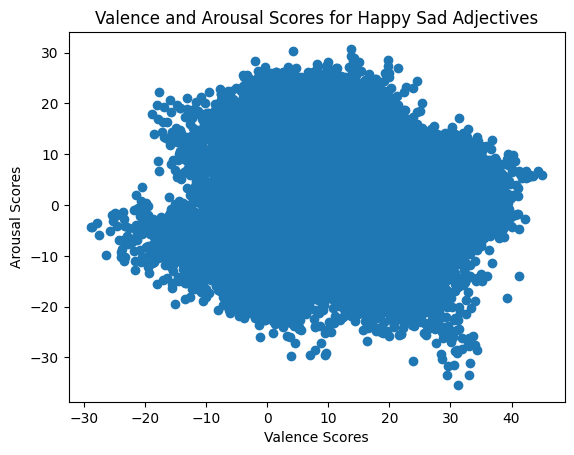

In [28]:
import matplotlib.pyplot as plt
# labels = [rep['adjective'] for rep in happy_sad_reps]
plt.scatter(valence_scores, arousal_scores, label='happy')
plt.xlabel('Valence Scores')
plt.ylabel('Arousal Scores')
plt.title('Valence and Arousal Scores for Happy Sad Adjectives')
plt.savefig('valence_arousal_scores.png')
plt.show()

In [27]:
len([rep['adjective'] for rep in happy_sad_reps])

48260